# Power Curve of the E. Portfolio

Below is the power curve for the power plants within the E. portfolio.

In [9]:
import sys
import os
import pandas as pd

# Add the source directory to the system path
sys.path.append(os.path.abspath('../../src'))
from open_data import fetch_db_table_sqlserver16_
import utils
import importlib
# Reload the module
importlib.reload(utils)

# SQL query to fetch data
sql_query = """
SELECT * 
FROM POWER_CURVE_QH_HISTORY 
WHERE CALENDAR_QH_END_DATE > '2019-01-01'
  AND ID_CURVE_SOURCE = 1
"""
power_curve = fetch_db_table_sqlserver16_(sql=sql_query, verbose=False)
power_curve = power_curve.sort_values(by='CALENDAR_QH_END_DATE')

power_curve

c:\imbalance_forecast\src\open_data.py:46: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, con, params=parameters)


,ID_POD,ID_POWER_CURVE_TYPE,CALENDAR_QH_START_DATE,CALENDAR_QH_START_HOUR,CALENDAR_QH_END_DATE,CALENDAR_QH_END_HOUR,CURVE_VALUE_kWh,POWER_VALUE_kW,LOADTIME,ID_CURVE_STATUS,ID_CURVE_SOURCE,FILE_NAME,OUT_OF_COMMISSION
222,2682,2,2024-08-26 11:15:00,12,2024-08-26 11:30:00,12,125.000,500.00,2024-08-26 11:30:30.027,3,1,thingsboard_12_15,0
201,2156,2,2024-08-26 11:15:00,12,2024-08-26 11:30:00,12,158.415,633.66,2024-08-26 11:30:30.027,3,1,thingsboard_12_15,0
200,2155,2,2024-08-26 11:15:00,12,2024-08-26 11:30:00,12,49.653,198.61,2024-08-26 11:30:30.027,3,1,thingsboard_12_15,0
199,95,2,2024-08-26 11:15:00,12,2024-08-26 11:30:00,12,204.750,819.00,2024-08-26 11:30:30.027,3,1,thingsboard_12_15,0
198,492,2,2024-08-26 11:15:00,12,2024-08-26 11:30:00,12,512.568,2050.27,2024-08-26 11:30:30.027,3,1,thingsboard_12_15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2476970,398,2,2024-11-21 09:00:00,10,2024-11-21 09:15:00,10,107.565,430.26,2024-11-21 09:21:00.003,3,1,thingsboard_10_0,0
2476969,396,2,2024-11-21 09:00:00,10,2024-11-21 09:15:00,10,111.310,445.24,2024-11-21 09:21:00.003,3,1,thingsboard_10_0,0
2476968,397,2,2024-11-21 09:00:00,10,2024-11-21 09:15:00,10,94.190,376.76,2024-11-21 09:21:00.003,3,1,thingsboard_10_0,0
2476975,8,2,2024-11-21 09:00:00,10,2024-11-21 09:15:00,10,0.000,0.00,2024-11-21 09:21:00.003,3,1,thingsboard_10_0,0


In [10]:
unique_id_curve_type = power_curve['ID_POWER_CURVE_TYPE'].unique()

# Convert to list if needed
id_curve_list = unique_id_curve_type.tolist()

# Display the unique energy sources
print(id_curve_list)

[2]


In [11]:
unique_id_curve_status = power_curve['ID_CURVE_STATUS'].unique()

# Convert to list if needed
id_curve_status_list = unique_id_curve_status.tolist()

# Display the unique energy sources
print(id_curve_status_list)

[3]


In [12]:
unique_id_pod = power_curve['ID_POD'].unique()

# Convert to list if needed
id_curve_pod_list = unique_id_pod.tolist()

# Display the unique energy sources
print(id_curve_pod_list)

[2682, 2156, 2155, 95, 492, 496, 852, 2158, 500, 522, 710, 185, 520, 681, 2934, 734, 2159, 2643, 3085, 2620, 49, 350, 464, 1078, 1079, 3132, 1110, 328, 325, 733, 335, 664, 2154, 2153, 2140, 238, 1024, 149, 2893, 2891, 2896, 2895, 2894, 542, 2892, 3033, 2942, 2438, 2430, 2428, 2881, 2427, 3032, 2993, 296, 3049, 150, 178, 175, 2524, 2527, 2526, 2525, 151, 2609, 2310, 2309, 700, 538, 2745, 6, 148, 584, 1083, 2566, 517, 744, 571, 2615, 245, 1027, 1054, 521, 112, 91, 572, 837, 282, 836, 741, 1055, 1056, 523, 98, 2381, 2382, 212, 1074, 514, 529, 530, 109, 2142, 20, 728, 277, 57, 519, 585, 583, 379, 267, 181, 15, 968, 894, 892, 1022, 924, 969, 970, 891, 859, 2705, 2706, 237, 738, 2726, 2571, 2287, 724, 259, 2150, 493, 269, 275, 2147, 305, 313, 336, 251, 2148, 2624, 3122, 722, 723, 725, 2424, 543, 2886, 2168, 673, 689, 359, 358, 882, 874, 866, 322, 2405, 401, 2716, 2182, 2866, 2719, 2720, 2928, 473, 457, 341, 317, 362, 2149, 88, 357, 378, 586, 2185, 2166, 2740, 2632, 377, 2181, 330, 2414, 3065

In [13]:
# Group by CALENDAR_QH_END_DATE and sum relevant columns
result = power_curve.groupby('CALENDAR_QH_END_DATE')[['CURVE_VALUE_kWh', 'POWER_VALUE_kW']].sum().reset_index()
result

,CALENDAR_QH_END_DATE,CURVE_VALUE_kWh,POWER_VALUE_kW
0,2024-08-26 11:30:00,54603.943,218415.58
1,2024-08-26 11:45:00,55066.944,220267.56
2,2024-08-26 12:00:00,55740.513,222961.80
3,2024-08-26 12:15:00,56074.947,224299.57
4,2024-08-26 12:30:00,55602.512,222409.83
...,...,...,...
8255,2024-11-21 08:15:00,52807.799,211230.98
8256,2024-11-21 08:30:00,54989.442,219957.56
8257,2024-11-21 08:45:00,56508.231,226032.72
8258,2024-11-21 09:00:00,57934.257,231736.83


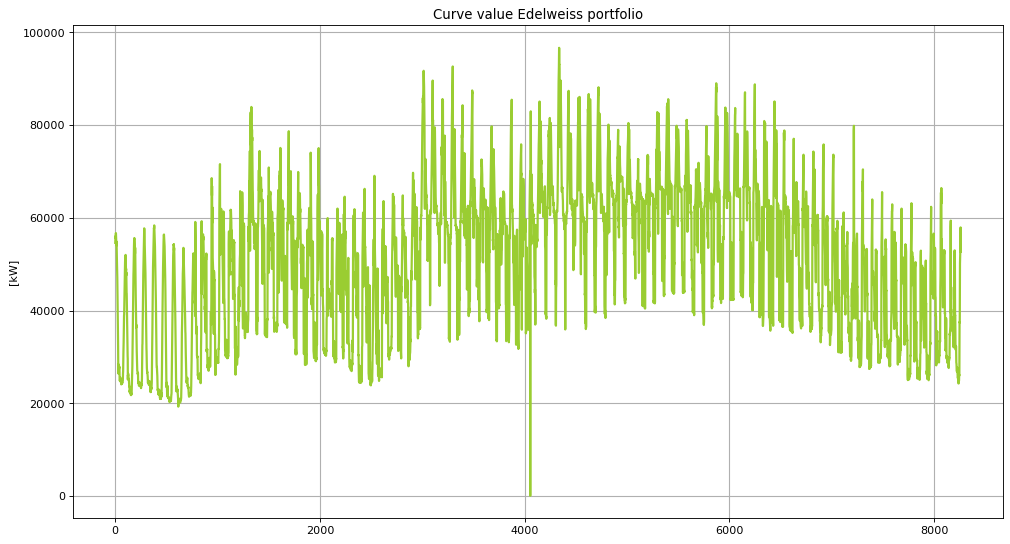

In [15]:
import matplotlib.pyplot as plt

DPI = 80
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(result["CURVE_VALUE_kWh"], linewidth=2, color = "yellowgreen") 

ax.set_title("Curve value Edelweiss portfolio"); ax.set_ylabel("[kW]")
ax.grid(True, which='both',  linewidth=1)
plt.show()

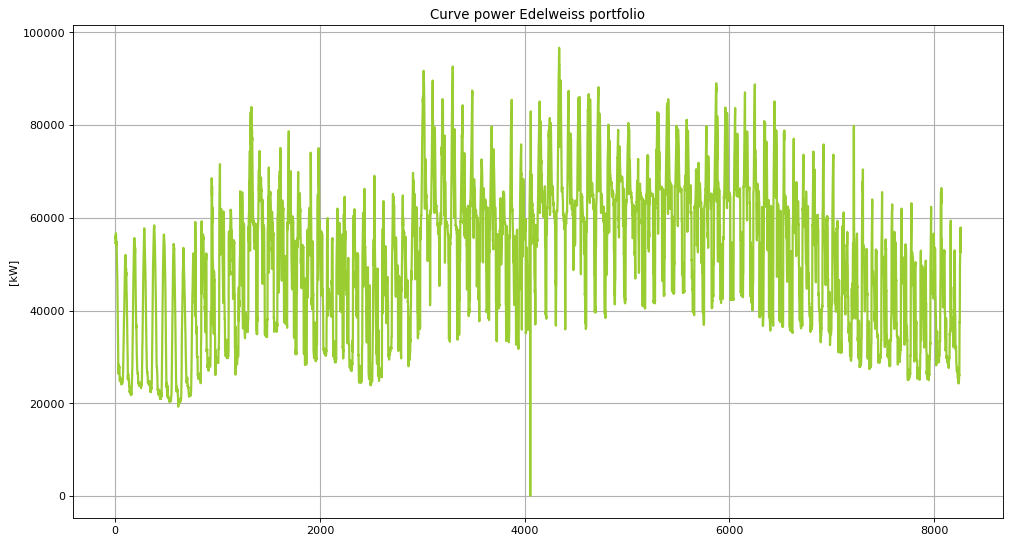

In [16]:
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(result["CURVE_VALUE_kWh"], linewidth=2, color = "yellowgreen") 

ax.set_title("Curve power Edelweiss portfolio"); ax.set_ylabel("[kW]")
ax.grid(True, which='both',  linewidth=1)
plt.show()